<a href="https://colab.research.google.com/github/myangel2814/SQL-BU-I-3/blob/main/Facebook_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Load the data into a Pandas DataFrame
fb_data = pd.read_csv('/content/VienThamMyVanTruong (1) (1).csv')

In [ ]:
fb_data.head(10)

,id,name,shares,likes,loves,wow,cares,sad,angry,haha,reactions_count,comments,content,posted_on,video,image,post_url
0,pfbid02Z45hqh8BG5dLbu8EeBJzmZw6PvKqKyKeBfLT4YG...,Viện Thẩm Mỹ Văn Trường.,0,16,1,0,1,0,0,0,18,0,COMBO NÂNG MŨI & CẮT MÍ TẠI DR.VĂN TRƯỜNG - K...,2024-03-21 10:25:55.549932,['blob:https://www.facebook.com/af6a61b4-c95f-...,https://scontent.fsgn8-4.fna.fbcdn.net/v/t15.5...,https://www.facebook.com/VienThamMyVanTruong/p...
1,pfbid0CuCy9m6WMPi3c9LNX3ifm4PqTetJz7NS5Dh6BhfU...,Viện Thẩm Mỹ Văn Trường.,0,9,0,0,0,0,0,0,9,1,XÓA SẸO CHỈ TỪ 799K,2024-03-21 09:26:02.033827,['blob:https://www.facebook.com/848bea6d-2149-...,https://scontent.fsgn8-4.fna.fbcdn.net/v/t15.5...,https://www.facebook.com/VienThamMyVanTruong/p...
2,pfbid02Xckim4G8uxqx6uhTMC5p5VBU53qaFGfd6sACRhs...,Viện Thẩm Mỹ Văn Trường.,0,12,0,0,0,0,0,0,12,1,DA CĂNG - MỌNG - MỊN chỉ sau 1 liệu trình( Ưu ...,2024-03-21 09:26:02.206391,[],https://scontent.fsgn8-4.fna.fbcdn.net/v/t39.3...,https://www.facebook.com/VienThamMyVanTruong/p...
3,pfbid02TiFcpiwZUVVPfpXA5DVDaDRjLyDMXV3eiECDscF...,Viện Thẩm Mỹ Văn Trường.,0,18,1,0,0,0,0,0,19,1,[ NÂNG MŨI ] DỰNG TRỤ TOÀN PHẦN SỤN SINH HỌC ...,2024-03-21 09:26:02.367805,['blob:https://www.facebook.com/287df8c4-ecec-...,https://scontent.fsgn8-4.fna.fbcdn.net/v/t15.5...,https://www.facebook.com/VienThamMyVanTruong/p...
4,pfbid02oXFbJzWQrKpxpBeFMYroKZ5MsbZg2dJrDUahJMy...,Viện Thẩm Mỹ Văn Trường.,0,32,5,0,0,0,0,0,37,8,Để có được nhan sắc này thì trước đó khách tô...,2024-03-20 09:26:08.805855,['blob:https://www.facebook.com/bae7757d-d1a4-...,https://scontent.fsgn8-4.fna.fbcdn.net/v/t15.5...,https://www.facebook.com/VienThamMyVanTruong/p...
5,pfbid036MvDjT6uFvgG3jerMBDXmcHz5YgmS9w5BWUJpyW...,Viện Thẩm Mỹ Văn Trường.,1,53,0,0,0,0,0,0,53,44,Vòng 1 như thế này thì chê vào đâu được ạ!KHÁC...,2024-03-19 09:26:09.040389,['blob:https://www.facebook.com/3a4531ab-0590-...,https://scontent.fsgn8-4.fna.fbcdn.net/v/t15.5...,https://www.facebook.com/VienThamMyVanTruong/p...
6,pfbid02kYhZ3YPQBiwyZM1YcGoVr8wbGCtB5WAfz583YJW...,Viện Thẩm Mỹ Văn Trường.,0,16,2,0,0,0,0,0,18,1,[ Feedback ] Nâng Mũi Cấu Trúc sụn sinh học ổn...,2024-03-19 09:26:09.406331,[],https://scontent.fsgn8-4.fna.fbcdn.net/v/t39.3...,https://www.facebook.com/VienThamMyVanTruong/p...
7,pfbid0LCPv5s45wgS64DyQs7KFzjT2a4rEoKTFNmGP2CA9...,Viện Thẩm Mỹ Văn Trường.,0,22,4,0,0,0,0,0,26,0,NaN,2024-03-18 09:26:15.708861,[],NaN,https://www.facebook.com/VienThamMyVanTruong/p...
8,pfbid033QErXd262KUT7ZA8MKSNR9ZkBxokFpkWdbb27bj...,Viện Thẩm Mỹ Văn Trường.,0,10,0,0,0,0,0,0,10,0,Cặp lông mày suất sắcKhông chỉ đẹp sau khi làm...,2024-03-17 09:26:15.876232,['blob:https://www.facebook.com/8e74b038-c495-...,https://scontent.fsgn8-4.fna.fbcdn.net/v/t15.5...,https://www.facebook.com/VienThamMyVanTruong/p...
9,pfbid02eBThDZGVD1WQyF1MLdFLhAsRLsiGBFJGCKmTn1d...,Viện Thẩm Mỹ Văn Trường.,0,13,0,0,1,0,0,0,14,1,Thiên thần là có thật chỉ sau 14 ngày sự thay ...,2024-03-17 09:26:16.028388,['blob:https://www.facebook.com/acc70bf2-859a-...,https://scontent.fsgn8-4.fna.fbcdn.net/v/t15.5...,https://www.facebook.com/VienThamMyVanTruong/p...


In [ ]:
# Display the first few rows of the data
fb_data.shape
fb_data.info()

#understand the data types and change the data type of each column
print(fb_data.dtypes)
fb_data['posted_on'] = pd.to_datetime(fb_data['posted_on'], format='ISO8601')# change the data type of posted_on column

# Check for missing values
print(fb_data.isnull().sum())

# Descriptive statistics

print("-----------------------------------------")
print(fb_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1146 non-null   object        
 1   name             1148 non-null   object        
 2   shares           1148 non-null   int64         
 3   likes            1148 non-null   int64         
 4   loves            1148 non-null   int64         
 5   wow              1148 non-null   int64         
 6   cares            1148 non-null   int64         
 7   sad              1148 non-null   int64         
 8   angry            1148 non-null   int64         
 9   haha             1148 non-null   int64         
 10  reactions_count  1148 non-null   int64         
 11  comments         1148 non-null   int64         
 12  content          1093 non-null   object        
 13  posted_on        1148 non-null   datetime64[ns]
 14  video            1148 non-null   object 

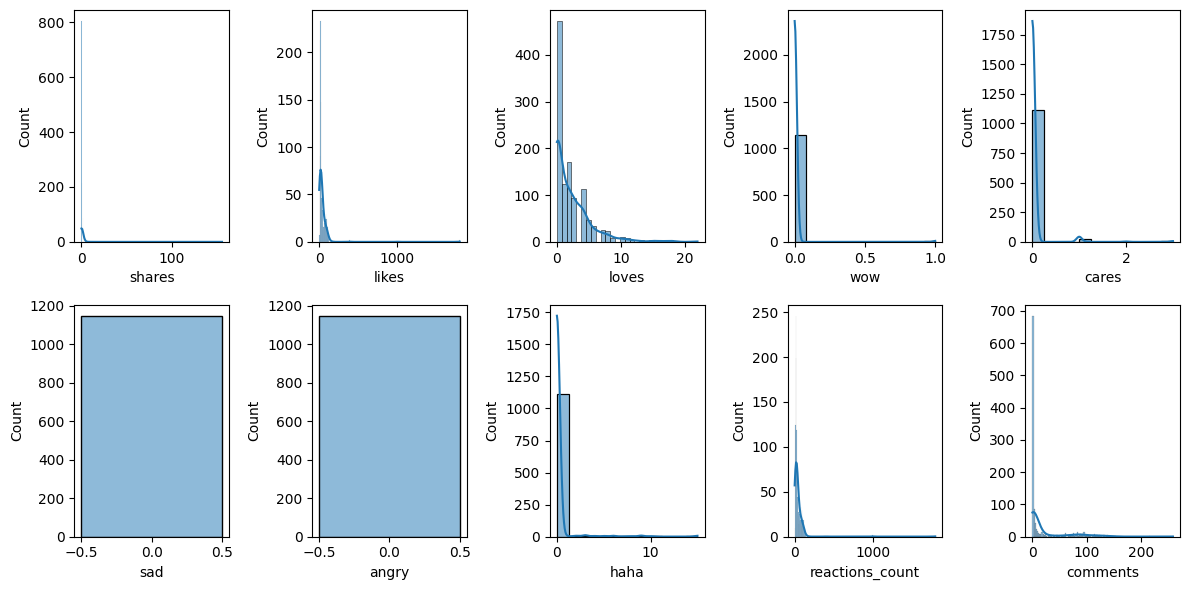

In [ ]:
# Analyze the distribution of numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments'], start=1):
    plt.subplot(2, 5, i)
    sns.histplot(data=fb_data, x=col, kde=True)
plt.tight_layout()
plt.show()


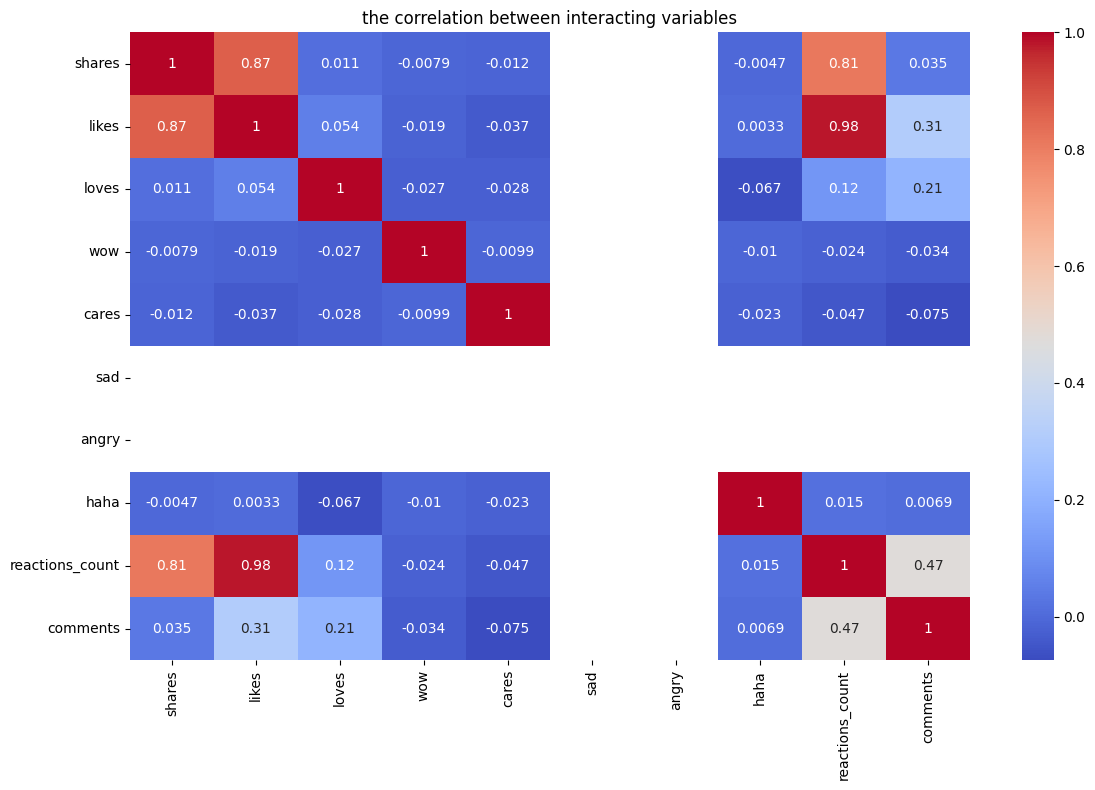

In [ ]:
columns_to_combine = ['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']

# Create a new column 'combined_values' by summing up the specified columns
fb_data['reactions_count'] = fb_data[columns_to_combine].sum(axis=1)

# Now 'fb_data_combined' contains the original columns plus the new combined column
fb_data_combined = fb_data.copy()

# Exclude non-numeric columns before calculating correlation
numeric_columns = fb_data_combined.select_dtypes(include=[np.number]).columns
correlation_data = fb_data_combined[numeric_columns]

# Analyze the relationship between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title("the correlation between interacting variables")
plt.tight_layout()  # Adjust margins for better layout
plt.show()



In [ ]:
# Analyze the content of text data
fb_data_with_content = fb_data[fb_data['content'].notnull()]
fb_data_with_content['content_length'] = fb_data_with_content['content'].apply(len)
print(fb_data_with_content['content_length'].describe())

count    1093.000000
mean      492.850869
std       429.140073
min        17.000000
25%       169.000000
50%       370.000000
75%       718.000000
max      3261.000000
Name: content_length, dtype: float64


<ipython-input-8-3ff06b284ac8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_data_with_content['content_length'] = fb_data_with_content['content'].apply(len)


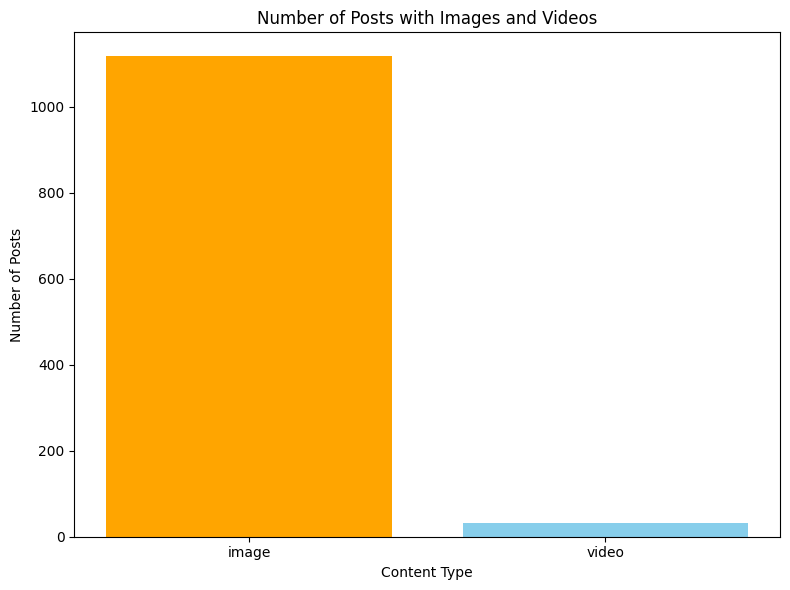

In [ ]:
fb_data['content_type'] = 'text'  # Start with 'text' for all rows
fb_data.loc[~fb_data['video'].isnull(), 'content_type'] = 'video'
fb_data.loc[~fb_data['image'].isnull(), 'content_type'] = 'image'

# Group the data by content type and calculate the count for each type
count_by_content_type = fb_data.groupby('content_type').size().reset_index(name='count')

# Plot the chart
plt.figure(figsize=(8, 6))
plt.bar(count_by_content_type['content_type'], count_by_content_type['count'], color=['orange', 'skyblue', 'green'])
plt.title('Number of Posts with Images and Videos')
plt.xlabel('Content Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

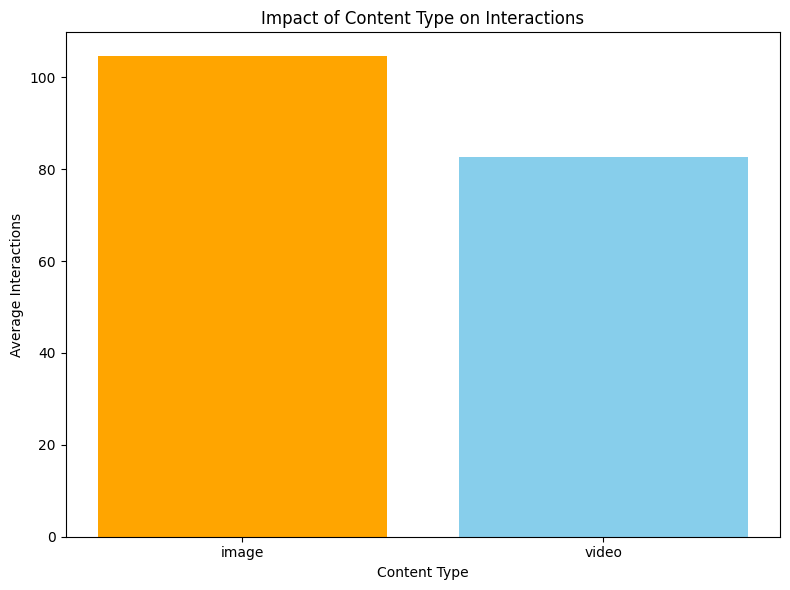

In [ ]:
# impact of content type on interactions
# Create a new column 'content_type' based on the presence of video and image links
fb_data['content_type'] = 'text'  # Start with 'text' for all rows
fb_data.loc[~fb_data['video'].isnull(), 'content_type'] = 'video'
fb_data.loc[~fb_data['image'].isnull(), 'content_type'] = 'image'

# Group the data by content type and calculate the average interactions for each type
interactions_by_content_type = fb_data.groupby('content_type')['reactions_count'].mean().reset_index()

# Plot the chart
plt.figure(figsize=(8, 6))
plt.bar(interactions_by_content_type['content_type'], interactions_by_content_type['reactions_count'], color=['orange', 'skyblue', 'green'])
plt.title('Impact of Content Type on Interactions')
plt.xlabel('Content Type')
plt.ylabel('Average Interactions')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

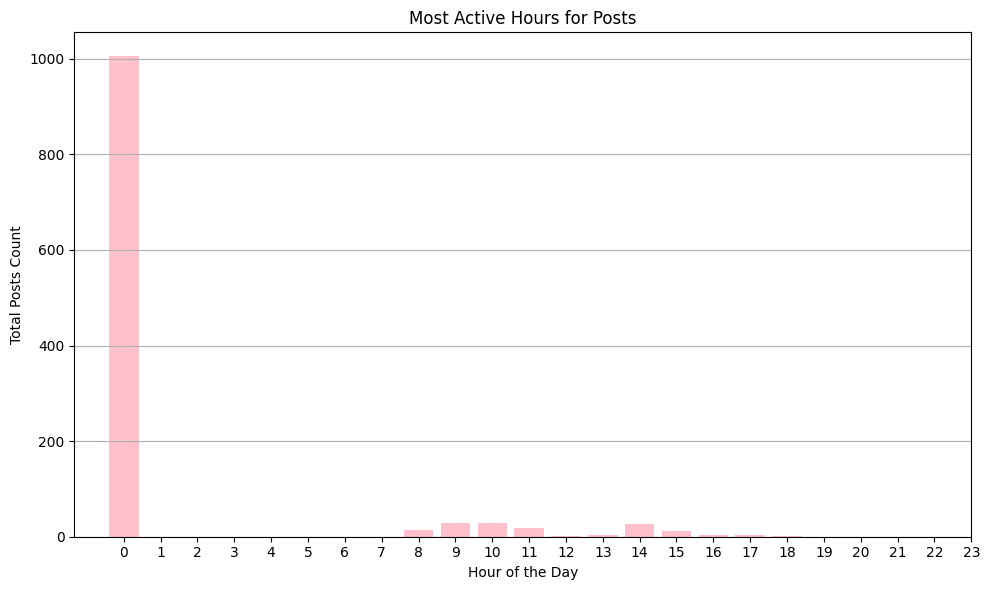

In [ ]:
fb_data['hour'] = fb_data['posted_on'].dt.hour
posts_by_hour = fb_data.groupby('hour').size().reset_index(name='total_posts')
# Plot the chart
plt.figure(figsize=(10, 6))
plt.bar(posts_by_hour['hour'], posts_by_hour['total_posts'], color='pink')
plt.title('Most Active Hours for Posts')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Posts Count')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(axis='y')  # Add grid for the y-axis to make it easier to read the data
plt.tight_layout()
plt.show()

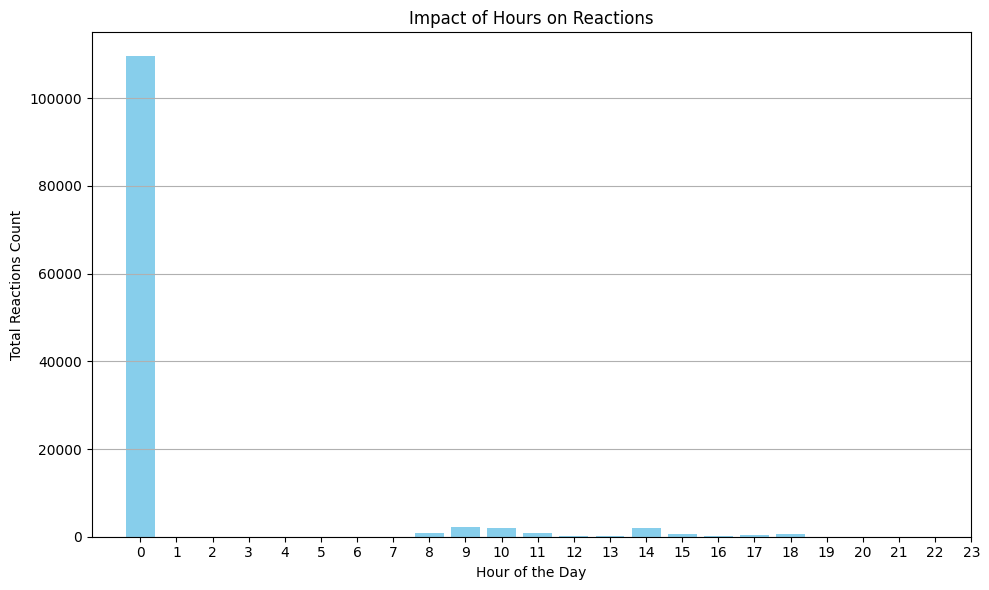

In [ ]:
# Impact of hours of a day on Reactions in all time from 2023 to 2024

# Convert 'posted_on' column to datetime if not already done
fb_data['posted_on'] = pd.to_datetime(fb_data['posted_on'])

# Extract hour from the 'posted_on' column
fb_data['hour'] = fb_data['posted_on'].dt.hour

# Group the data by hour and calculate the total number of reactions for each hour
reactions_by_hour = fb_data.groupby('hour')['reactions_count'].sum().reset_index()

# Plot the chart
plt.figure(figsize=(10, 6))
plt.bar(reactions_by_hour['hour'], reactions_by_hour['reactions_count'], color='skyblue')
plt.title('Impact of Hours on Reactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Reactions Count')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(axis='y')  # Add grid for the y-axis to make it easier to read the data
plt.tight_layout()
plt.show()

<ipython-input-21-31a6a9ccc4da>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_data_filtered['month_year'] = fb_data_filtered['posted_on'].dt.to_period('M')


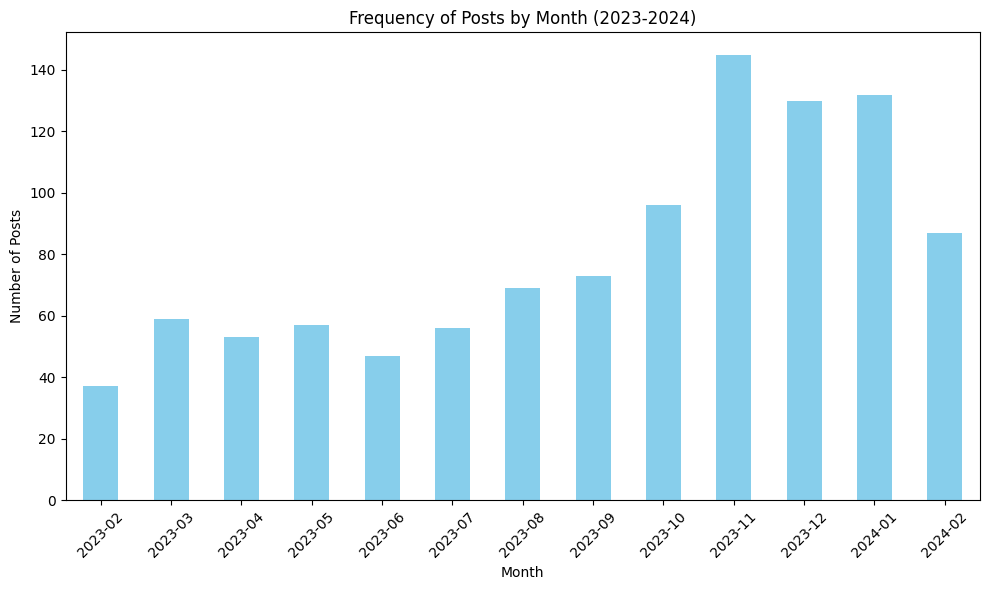

In [ ]:
# Convert 'posted_on' to datetime
fb_data['posted_on'] = pd.to_datetime(fb_data['posted_on'])

# Filter data for the specified time range (from January 2023 to December 2024)
start_date = pd.Timestamp(2023, 1, 1)
end_date = pd.Timestamp(2024, 3, 1)
fb_data_filtered = fb_data[(fb_data['posted_on'] >= start_date) & (fb_data['posted_on'] <= end_date)]

# Extract month and year from 'posted_on' and create a new column 'month_year'
fb_data_filtered['month_year'] = fb_data_filtered['posted_on'].dt.to_period('M')

# Count the number of posts for each month
monthly_post_counts = fb_data_filtered['month_year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_post_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Posts by Month (2023-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-22-f69b1ba1ab5e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_data_filtered['month_year'] = fb_data_filtered['posted_on'].dt.to_period('M')


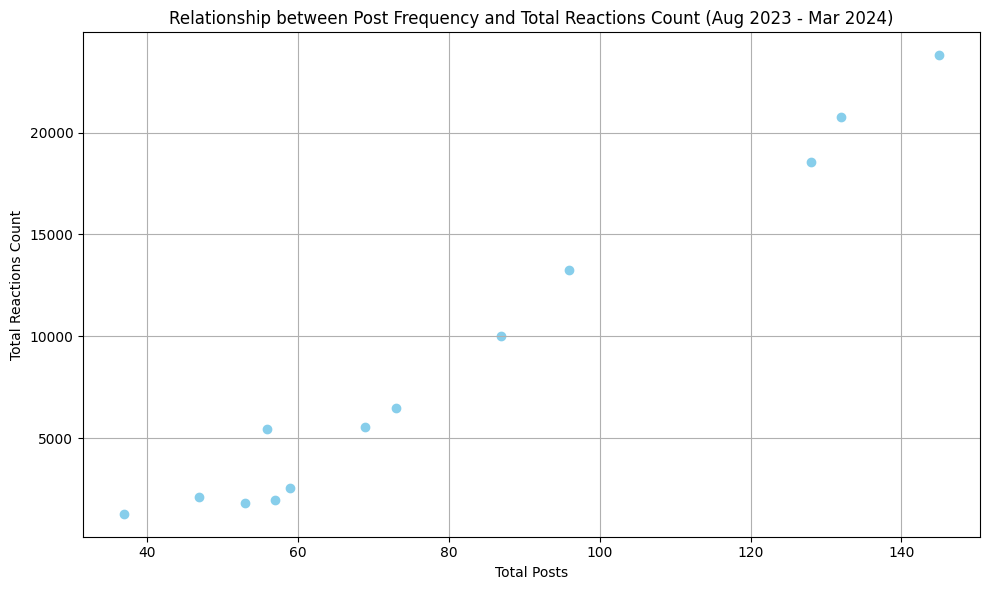

In [ ]:
# draw chart illustrate Relationship between Post Frequency and Total Reactions Count (Aug 2023 - Mar 2024)

fb_data['posted_on'] = pd.to_datetime(fb_data['posted_on'])

# Filter data for the specified time range (from January 2023 to December 2024)
start_date = pd.Timestamp(2023, 1, 1)
end_date = pd.Timestamp(2024, 3, 1)
# Extract month and year from 'posted_on' and create a new column 'month_year'
fb_data_filtered['month_year'] = fb_data_filtered['posted_on'].dt.to_period('M')

# Group by 'month_year' and calculate the total number of posts and the sum of 'reactions_count' for each month
monthly_data = fb_data_filtered.groupby('month_year').agg({'reactions_count': 'sum', 'id': 'count'})
monthly_data = monthly_data.rename(columns={'id': 'total_posts'})  # Rename the column for clarity

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['total_posts'], monthly_data['reactions_count'], color='skyblue')
plt.title('Relationship between Post Frequency and Total Reactions Count (Aug 2023 - Mar 2024)')
plt.xlabel('Total Posts')
plt.ylabel('Total Reactions Count')
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()
plt.show()


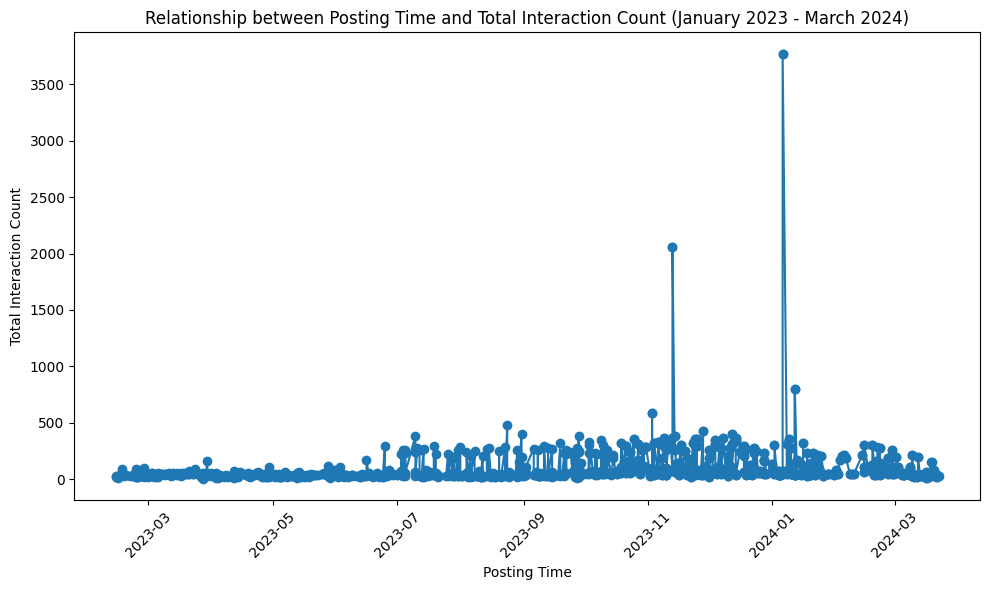

In [ ]:
# Relationship between Posting Time and Total Interaction Count (January 2023 - March 2024)

# Convert 'posted_on' to datetime if it's not already in datetime format
fb_data['posted_on'] = pd.to_datetime(fb_data['posted_on'])

# Filter data for the specified time range (from January 2023 to March 2024)
start_date = pd.Timestamp(2023, 1, 1)
end_date = pd.Timestamp(2024, 4, 1)
fb_data_filtered = fb_data[(fb_data['posted_on'] >= start_date) & (fb_data['posted_on'] <= end_date)]

# Sort the filtered DataFrame by 'posted_on' to ensure the line plot is drawn chronologically
fb_data_sorted = fb_data_filtered.sort_values(by='posted_on')

plt.figure(figsize=(10, 6))
plt.plot(fb_data_sorted['posted_on'], fb_data_sorted['reactions_count'], marker='o', linestyle='-')
plt.title('Relationship between Posting Time and Total Interaction Count (January 2023 - March 2024)')
plt.xlabel('Posting Time')
plt.ylabel('Total Interaction Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()





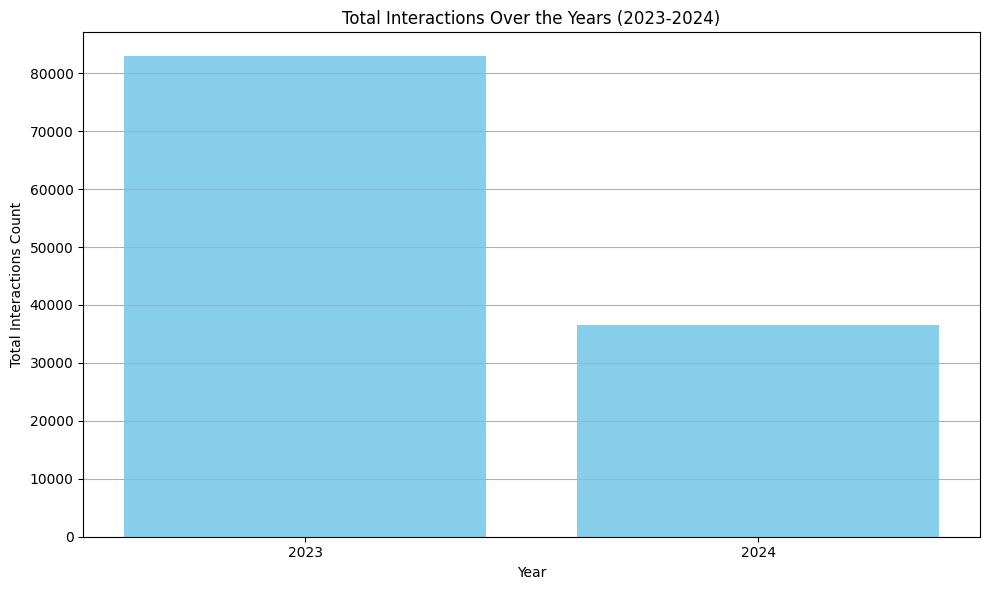

In [ ]:
# Convert 'posted_on' column to datetime
fb_data['posted_on'] = pd.to_datetime(fb_data['posted_on'])

# Extract year from the 'posted_on' column
fb_data['year'] = fb_data['posted_on'].dt.year

# Group the data by year and calculate the total interactions count for each year
interactions_by_year = fb_data.groupby('year')['reactions_count'].sum().reset_index()

# Plot the chart
plt.figure(figsize=(10, 6))
plt.bar(interactions_by_year['year'], interactions_by_year['reactions_count'], color='skyblue')
plt.title('Total Interactions Over the Years (2023-2024)')
plt.xlabel('Year')
plt.ylabel('Total Interactions Count')
plt.xticks(interactions_by_year['year'])  # Set x-axis ticks as the years
plt.grid(axis='y')  # Add grid for the y-axis to make it easier to read the data
plt.tight_layout()
plt.show()




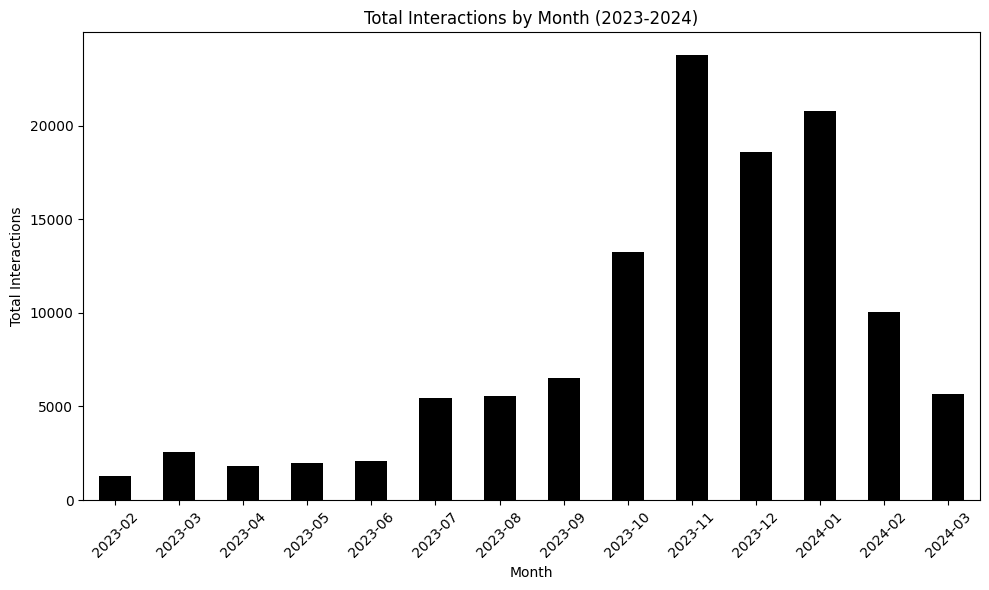

In [ ]:
fb_data['posted_on'] = pd.to_datetime(fb_data['posted_on'])

# Filter data for the specified time range (from January 2023 to December 2024)
start_date = pd.Timestamp(2023, 1, 1)
end_date = pd.Timestamp(2024, 4, 1)
fb_data_filtered = fb_data[(fb_data['posted_on'] >= start_date) & (fb_data['posted_on'] <= end_date)]

# Extract month and year from 'posted_on' and create a new column 'month_year'
fb_data_filtered['month_year'] = fb_data_filtered['posted_on'].dt.to_period('M')

# Calculate the total interaction for each month
monthly_interaction_counts = fb_data_filtered.groupby('month_year')['reactions_count'].sum().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_interaction_counts.plot(kind='bar', color='black')
plt.title('Total Interactions by Month (2023-2024)')
plt.xlabel('Month')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-25-5b1412113342>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_data_filtered['caption_length'] = fb_data_filtered['content'].apply(len)


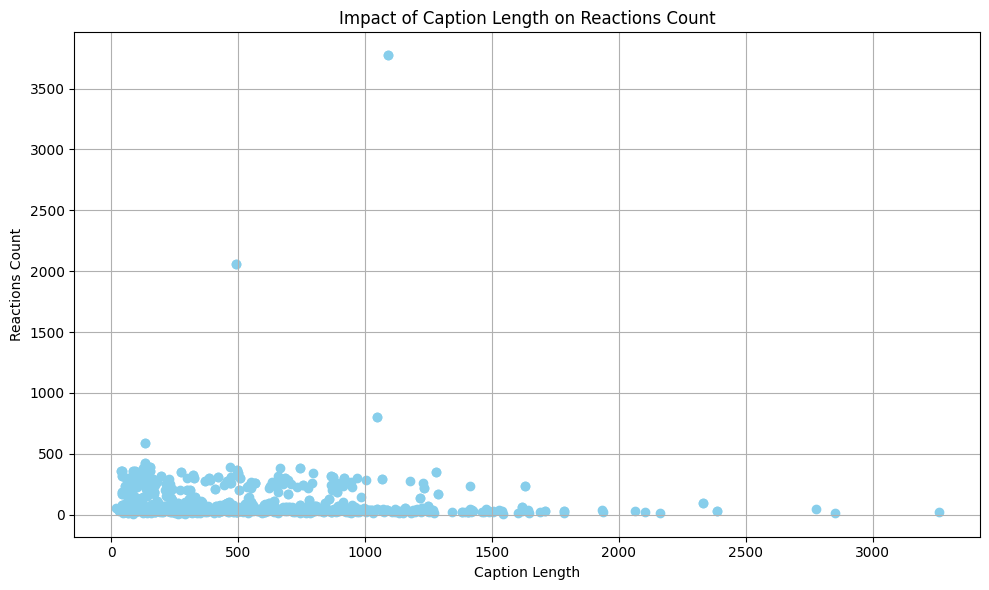

In [ ]:
# Relation of Caption and Reaction Count

# Calculate the length of each content caption
fb_data_filtered['caption_length'] = fb_data_filtered['content'].apply(len)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fb_data_filtered['caption_length'], fb_data_filtered['reactions_count'], color='skyblue')
plt.title('Impact of Caption Length on Reactions Count')
plt.xlabel('Caption Length')
plt.ylabel('Reactions Count')
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()
plt.show()

In [ ]:
# Tested with TF-IDF vectorizer.
# Relation of caption content and Reaction Count
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values in the 'content' column
fb_data_filtered.dropna(subset=['content'], inplace=True)

# Vectorize caption content using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(fb_data_filtered['content'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, fb_data_filtered['reactions_count'], test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict reactions_count for test set
y_pred = model.predict(X_test)

# Evaluate model performance
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


<ipython-input-20-e25b220c876f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_data_filtered.dropna(subset=['content'], inplace=True)


Mean Squared Error: 22845.221359876126
R^2 Score: -1.7725334807860413


<ipython-input-21-6b30c292fa36>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_data_filtered.dropna(subset=['content'], inplace=True)


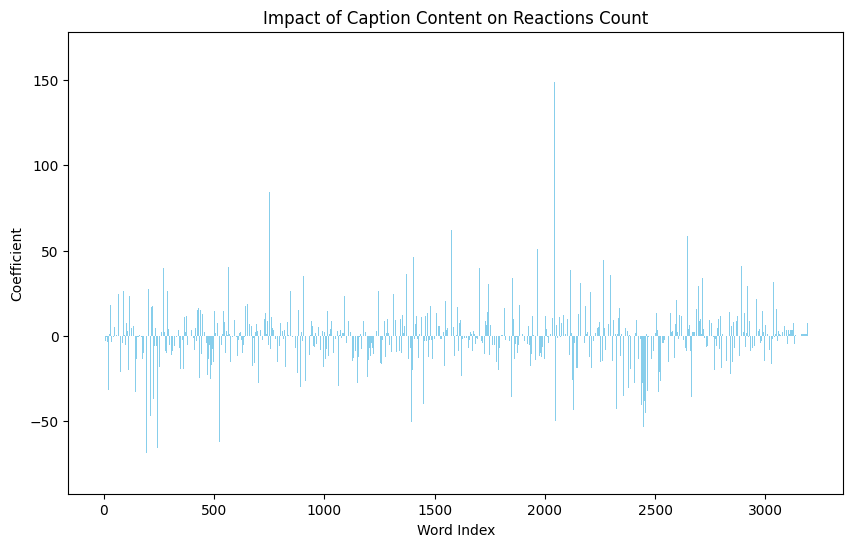

In [ ]:
# Draw chart illustrate Impact of Caption Content on Reactions Count

# Assuming 'fb_data_filtered' DataFrame contains relevant data
# Drop rows with missing values in the 'content' column
fb_data_filtered.dropna(subset=['content'], inplace=True)

# Vectorize caption content using CountVectorizer (you can also use TF-IDF or other methods)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(fb_data_filtered['content'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, fb_data_filtered['reactions_count'], test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients of the model
coefficients = model.coef_

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients, color='skyblue')
plt.title('Impact of Caption Content on Reactions Count')
plt.xlabel('Word Index')
plt.ylabel('Coefficient')
plt.show()


In [ ]:
# Get vocabulary from CountVectorizer
vocabulary = vectorizer.get_feature_names_out()

# Create a dictionary to map word indices to words
word_index_to_word = {index: word for word, index in vectorizer.vocabulary_.items()}

# Create lists to store positive and negative words
positive_words = []
negative_words = []

# Iterate through coefficients and find positive and negative words
for i, coefficient in enumerate(coefficients):
    if coefficient > 0:
        positive_words.append(word_index_to_word[i])
    else:
        negative_words.append(word_index_to_word[i])

# Print positive and negative words
print("Positive Words:", positive_words)
print("Negative Words:", negative_words)


Positive Words: ['000', '000đ', '000𝐒𝐄𝐗𝐘𝐋𝐈𝐏𝐒', '02', '03', '039', '05', '0763', '0907405678023635065070941', '0941', '0971185678', '0đ', '10', '100k', '10cm', '11h', '12', '15', '17h', '19', '1955', '199', '1m58', '1m61', '20', '2024', '21', '22', '230', '250cc', '26', '275cc', '285cc', '295cc', '29kk', '2bqkpxk', '2d4ca9o', '2k3', '30', '300', '300cc', '31', '320', '325cc', '335', '340', '340cc', '35', '350cc', '365', '399', '400cc', '41kg', '42', '45', '49', '4triệu8', '500', '500k', '54kg', '550', '5678', '594', '5d', '5như', '65', '66', '67', '68', '69', '6dchỉ', '6tr', '6triệu', '70', '750', '808nm', '815', '82', '836', '840', '8h30', '90', 'academy', 'add', 'adm', 'ah', 'alo', 'am', 'anh', 'ba', 'bacsi', 'bacsivantruong', 'bank', 'bao', 'bay', 'beautyup', 'bi', 'big', 'bit', 'biê', 'black', 'bo', 'body', 'book', 'brow', 'buo', 'buô', 'buộc', 'bà', 'bài', 'bàn', 'bách', 'bám', 'bánh', 'báo', 'bát', 'bây', 'bã', 'bão', 'bè', 'bé', 'bì', 'bình', 'bí', 'bôi', 'bùng', 'bú', 'băn', 'bă

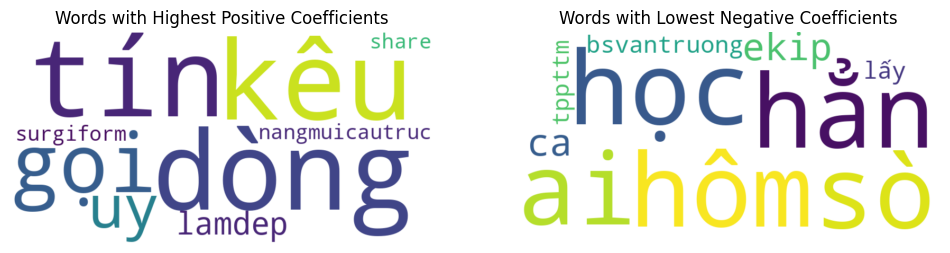

In [ ]:
# worldcloud many word has highest positive coefficients and lowest negative cofficients
from wordcloud import WordCloud
# Sort coefficients in ascending order
sorted_coefficients = sorted(enumerate(coefficients), key=lambda x: x[1])

# Get indices of words with highest positive coefficients and lowest negative coefficients
positive_indices = [index for index, coefficient in sorted_coefficients[-10:] if coefficient > 0]
negative_indices = [index for index, coefficient in sorted_coefficients[:10] if coefficient < 0]

# Get words with highest positive coefficients and lowest negative coefficients
positive_words = [word_index_to_word[index] for index in positive_indices]
negative_words = [word_index_to_word[index] for index in negative_indices]

# Join words into strings
positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)

# Generate WordClouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot WordClouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Words with Highest Positive Coefficients')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Words with Lowest Negative Coefficients')
plt.axis('off')

plt.show()
